## JWST F1280W Carine ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 25 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1280W"
fwhm = 3.7
basename = "jw0273100200"

crval = [159.21261854583094, -58.620018010874205]
# rotation = 103.
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.18453314576264052, -0.032365850976261525]
tile2_shifts = [0.18538584899573868, -0.03966800205771968]
tile3_shifts = [1.7505750809691034, -1.826683328950826]
tile4_shifts = [0.1874700534625803, -0.03952807029062376]
tile5_shifts = [0.18938011964430956, -0.037490623824123034]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [50., 2000.]
# display range for calibrated images
drange_cal = [30., 2000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1280W/stage0/jw02731002002_02105_00003_mirimage_uncal.fits', './F1280W/stage0/jw02731002001_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02731002002_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02731002004_02105_00008_mirimage_uncal.fits', './F1280W/stage0/jw02731002005_02105_00008_mirimage_uncal.fits', './F1280W/stage0/jw02731002005_02105_00004_mirimage_uncal.fits', './F1280W/stage0/jw02731002001_02105_00005_mirimage_uncal.fits', './F1280W/stage0/jw02731002001_02105_00008_mirimage_uncal.fits', './F1280W/stage0/jw02731002003_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02731002005_02105_00005_mirimage_uncal.fits', './F1280W/stage0/jw02731002001_02105_00002_mirimage_uncal.fits', './F1280W/stage0/jw02731002002_02105_00005_mirimage_uncal.fits', './F1280W/stage0/jw02731002002_02105_00001_mirimage_uncal.fits', './F1280W/stage0/jw02731002001_02105_00004_mirimage_uncal.fits', './F1280W/stage0/jw02731002005_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02731

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-25 13:15:09,649 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 13:15:09,650 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:15:09,651 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 13:15:09,652 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 13:15:09,652 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:15:09,653 - stpipe 

./F1280W/stage0/jw02731002002_02105_00003_mirimage_uncal.fits


2022-07-25 13:15:09,763 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1280W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-25 13:15:14,773 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-25 13:15:14,774 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-25 13:15:14,776 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-25 13:15:14,870 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:15:14,871 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:15:14,890 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-25 13:15:24,612 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-25 13:15:24,612 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-25 13:15:24,613 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-25 13:15:24,613 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-25 13:15:24,613 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-25 13:15:24,613 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-25 13:15:24,613 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-25 13:15:24,614 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-25 13:15:24,617 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-25 13:15:25,228 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-25 13:15:26,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:26,788 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:15:26,800 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:15:26,822 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:15:26,823 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:15:26,839 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:15:26,844 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1161 pixels with at least one CR from five groups.
2022-07-25 13:15:26,845 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixe

2022-07-25 13:15:27,270 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:15:27,307 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 939 pixels with at least one CR from five groups.
2022-07-25 13:15:27,308 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:27,308 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:27,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1188 pixels with at least one CR from five groups.
2022-07-25 13:15:27,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 13:15:27,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three gr

2022-07-25 13:15:28,733 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:28,734 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:28,803 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:15:28,886 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2130 pixels with at least one CR from five groups.
2022-07-25 13:15:28,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:28,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:29,467 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:15:29,550 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:15:39,418 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 13:15:39,419 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 13:15:39,419 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-07-25 13:15:39,420 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_ipc': None, 'class': ''}


2022-07-25 13:15:39,421 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance 

./F1280W/stage0/jw02731002001_02105_00006_mirimage_uncal.fits


2022-07-25 13:15:41,659 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:15:41,662 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:15:41,663 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:15:41,664 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:15:41,665 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:15:46,791 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:15:46,810 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:15:47,521 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:15:47,616 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:15:47,617 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:15:53,230 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:15:53,234 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1119 pixels with at least one CR from five groups.
2022-07-25 13:15:53,235 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:15:53,297 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:15:53,305 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:15:53,309 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1064 pixels with at least one CR from five groups.
2022-07-25

2022-07-25 13:15:53,805 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:15:53,824 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:15:53,836 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 825 pixels with at least one CR from five groups.
2022-07-25 13:15:53,837 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:53,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:53,854 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:15:53,884 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio,

2022-07-25 13:15:54,485 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 866 pixels with at least one CR from five groups.
2022-07-25 13:15:54,486 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:54,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:15:54,497 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:15:54,577 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 920 pixels with at least one CR from five groups.
2022-07-25 13:15:54,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:15:54,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 13:16:02,672 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:03,058 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:03,060 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:03,677 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:03,679 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:03,823 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:16:03,930 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:16:03,933 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:16:05,685 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:16:05,686 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:16:05,687 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:16:05,688 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002002_02105_00006_mirimage_uncal.fits


2022-07-25 13:16:07,772 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:16:07,775 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:16:07,776 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:16:07,777 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:16:07,778 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:16:12,830 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:16:12,850 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:16:13,563 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:16:13,661 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:16:13,662 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:16:19,239 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1409 pixels with at least one CR from five groups.
2022-07-25 13:16:19,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-25 13:16:19,290 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:16:19,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:16:19,304 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:16:19,307 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:16:19,311 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1275 pixels with at least one CR from

2022-07-25 13:16:19,823 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1247 pixels with at least one CR from five groups.
2022-07-25 13:16:19,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-25 13:16:19,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:16:19,828 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:16:19,849 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:16:19,857 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 963 pixels with at least one CR from five groups.
2022-07-25 13:16:19,858 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:16:19,859 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:16:20,583 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1191 pixels with at least one CR from five groups.
2022-07-25 13:16:20,584 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:16:20,584 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:16:20,594 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 953 pixels with at least one CR from five groups.
2022-07-25 13:16:20,595 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from four groups.
2022-07-25 13:16:20,596 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 13:16:20,598 - stpipe.Detector1Pipeline.jump - INFO - Working on integrati

2022-07-25 13:16:28,597 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:28,949 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:28,950 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:29,087 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:16:29,195 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:16:29,197 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:16:29,233 - stpipe.Detector1Pipeline.ga

2022-07-25 13:16:31,028 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:16:31,029 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:16:31,030 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002004_02105_00008_mirimage_uncal.fits


2022-07-25 13:16:32,858 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:16:32,862 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:16:32,864 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:16:32,865 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:16:32,866 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:16:38,081 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:16:38,100 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:16:38,795 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:16:38,898 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:16:38,899 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:16:44,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1191 pixels with at least one CR from five groups.
2022-07-25 13:16:44,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:16:44,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:16:44,698 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:16:44,700 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:16:44,703 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1373 pixels with at least one CR from five groups.
2022-07-25 13:16:44,703 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 13:16:45,305 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:16:45,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1071 pixels with at least one CR from five groups.
2022-07-25 13:16:45,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:16:45,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:16:45,341 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:16:45,345 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:16:45,350 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:16:46,099 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:16:46,101 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:16:46,115 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:16:46,182 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 984 pixels with at least one CR from five groups.
2022-07-25 13:16:46,183 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:16:46,184 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:16:46,186 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2121 pixels with at least one CR from five groups.
2022-07-25 13:16:46,187 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with 

2022-07-25 13:16:54,492 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:54,494 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:54,691 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:54,692 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:54,929 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:16:54,931 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:16:55,074 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:16:55,183 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:16:55,184 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-25 13:16:56,954 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:16:56,955 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:16:56,955 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:16:56,956 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00008_mirimage_uncal.fits


2022-07-25 13:16:58,774 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:16:58,777 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:16:58,778 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:16:58,779 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:16:58,780 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:17:03,775 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:17:03,793 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:17:04,482 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:17:04,584 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:17:04,585 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:17:10,245 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:17:10,245 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:10,327 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:17:10,331 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1050 pixels with at least one CR from five groups.
2022-07-25 13:17:10,330 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:17:10,332 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 13:17:10,332 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:17:10,913 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:17:10,926 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:17:10,926 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:17:10,954 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:17:10,969 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:17:10,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2347 pixels with at least one CR from five groups.
2022-07-25 13:17:10,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:17:10,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels

2022-07-25 13:17:11,616 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:17:11,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 954 pixels with at least one CR from five groups.
2022-07-25 13:17:11,655 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:17:11,656 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:11,725 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:17:11,799 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:17:11,804 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 912 pixels with at least one CR from five groups.
2022-07-25 13:17:11,805 - stpipe.Detector1Pipeline.jump -

2022-07-25 13:17:20,470 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:17:20,608 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:17:20,720 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:17:20,723 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:17:20,769 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:17:20,770 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:17:20,774 - stpipe.Detector1Pipelin

2022-07-25 13:17:22,491 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:17:22,492 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:17:22,493 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:17:22,493 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002005_02105_00004_mirimage_uncal.fits


2022-07-25 13:17:24,305 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:17:24,308 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:17:24,309 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:17:24,310 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:17:24,311 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:17:29,317 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:17:29,336 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:17:30,011 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:17:30,116 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:17:30,117 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:17:35,752 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:17:35,753 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:17:35,842 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:17:35,845 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:17:35,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1529 pixels with at least one CR from five groups.
2022-07-25 13:17:35,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 13:17:35,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from th

2022-07-25 13:17:36,372 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:36,384 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:17:36,386 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:17:36,425 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:17:36,471 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:17:36,501 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1050 pixels with at least one CR from five groups.
2022-07-25 13:17:36,503 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:17:36,504 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:36,509 - s

2022-07-25 13:17:37,078 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:37,081 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:17:37,082 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 974 pixels with at least one CR from five groups.
2022-07-25 13:17:37,082 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:17:37,083 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:17:37,162 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1114 pixels with at least one CR from five groups.
2022-07-25 13:17:37,163 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four grou

2022-07-25 13:17:46,062 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:17:46,203 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:17:46,319 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:17:46,322 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:17:46,357 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:17:46,358 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:17:46,361 - stpipe.Detector1Pipelin

2022-07-25 13:17:48,074 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:17:48,075 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:17:48,076 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:17:48,076 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002001_02105_00005_mirimage_uncal.fits


2022-07-25 13:17:50,070 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:17:50,073 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:17:50,075 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:17:50,076 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:17:50,078 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:17:55,271 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:17:55,290 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:17:55,975 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:17:56,093 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:17:56,094 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:18:01,824 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:18:01,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1482 pixels with at least one CR from five groups.
2022-07-25 13:18:01,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:18:01,882 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:18:01,908 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:18:01,899 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:01,903 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-25 13:18:02,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:18:02,463 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:18:02,472 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:02,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 922 pixels with at least one CR from five groups.
2022-07-25 13:18:02,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:18:02,506 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:18:02,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:18:02,525 - stpipe.Detector1Pipeline.jump - I

2022-07-25 13:18:03,130 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:18:03,175 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1049 pixels with at least one CR from five groups.
2022-07-25 13:18:03,176 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:03,176 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:18:03,209 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1038 pixels with at least one CR from five groups.
2022-07-25 13:18:03,210 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:03,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 13:18:11,325 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:11,548 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:11,550 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:11,593 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:11,594 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:11,738 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:18:11,853 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:18:11,856 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:18:13,892 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:18:13,893 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:18:13,893 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:18:13,894 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002001_02105_00008_mirimage_uncal.fits


2022-07-25 13:18:15,891 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:18:15,895 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:18:15,896 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:18:15,896 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:18:15,897 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:18:21,071 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:18:21,092 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:18:21,794 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:18:21,902 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:18:21,903 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:18:27,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1030 pixels with at least one CR from five groups.
2022-07-25 13:18:27,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:18:27,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:18:27,734 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:27,755 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:18:27,759 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1262 pixels with at least one CR from five groups.
2022-07-25 13:18:27,760 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 13:18:28,279 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:18:28,299 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:28,339 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:18:28,344 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:28,355 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:28,368 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 856 pixels with at least one CR from five groups.
2022-07-25 13:18:28,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:28,370 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:18:28,379 - st

2022-07-25 13:18:28,950 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:28,951 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:18:28,983 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1147 pixels with at least one CR from five groups.
2022-07-25 13:18:28,984 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:28,985 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:18:29,041 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:18:29,111 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:29,122 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:18:37,402 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:37,404 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:37,556 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:37,558 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:37,725 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:37,725 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:18:37,727 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:37,727 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:18:37,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:18:37,994 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-07-25 13:18:40,399 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 13:18:40,399 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 13:18:40,400 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:18:40,401 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02731002003_02105_00006_mirimage_uncal.fits


2022-07-25 13:18:42,455 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:18:42,458 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:18:42,459 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:18:42,460 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:18:42,460 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:18:47,545 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:18:47,564 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:18:48,252 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:18:48,361 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:18:48,362 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:18:54,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from four groups.
2022-07-25 13:18:54,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 27 pixels with at least one CR from three groups.
2022-07-25 13:18:54,189 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:54,214 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:18:54,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1083 pixels with at least one CR from five groups.
2022-07-25 13:18:54,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:18:54,220 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:18:54,802 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:18:54,830 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:18:54,833 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:18:54,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2525 pixels with at least one CR from five groups.
2022-07-25 13:18:54,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:18:54,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:18:54,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1160 pixels with at least one CR from 

2022-07-25 13:18:55,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 975 pixels with at least one CR from five groups.
2022-07-25 13:18:55,495 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:18:55,496 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-25 13:18:55,504 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1187 pixels with at least one CR from five groups.
2022-07-25 13:18:55,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:18:55,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:18:55,574 - stpipe.Detector1Pipeline.jump - INFO - Working on integration

2022-07-25 13:19:04,532 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:04,534 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:04,874 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:04,876 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:05,015 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:19:05,132 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:19:05,142 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-07-25 13:19:06,891 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:19:06,891 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:19:06,892 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:19:06,893 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00005_mirimage_uncal.fits


2022-07-25 13:19:08,853 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:19:08,857 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:19:08,858 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:19:08,859 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:19:08,860 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:19:14,122 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:19:14,141 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:19:14,838 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:19:14,948 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:19:14,949 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:19:20,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-25 13:19:20,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:19:20,870 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:20,908 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:19:20,907 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:19:20,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1282 pixels with at least one CR from five groups.
2022-07-25 13:19:20,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from fo

2022-07-25 13:19:21,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:19:21,454 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:21,481 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:21,490 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:21,532 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:19:21,533 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:21,540 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 921 pixels with at least one CR from five groups.
2022-07-25 13:19:21,541 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:19:21,542 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, tw

2022-07-25 13:19:22,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:19:22,222 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:19:22,300 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:19:22,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 644 pixels with at least one CR from five groups.
2022-07-25 13:19:22,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:19:22,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:19:22,317 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:22,381 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 780 pixels with 

2022-07-25 13:19:31,538 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:31,540 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:31,683 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:19:31,800 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:19:31,803 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:19:31,838 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:19:31,839 - stpipe.De

2022-07-25 13:19:33,599 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:19:33,600 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:19:33,600 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:19:33,601 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002001_02105_00002_mirimage_uncal.fits


2022-07-25 13:19:35,488 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:19:35,491 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:19:35,492 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:19:35,493 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:19:35,494 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:19:40,765 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:19:40,785 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:19:41,473 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:19:41,584 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:19:41,585 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:19:47,300 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:19:47,320 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:19:47,315 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:19:47,319 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1289 pixels with at least one CR from five groups.
2022-07-25 13:19:47,320 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:19:47,371 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:19:47,396 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-25 13:19:47,879 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:47,886 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:19:47,890 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2323 pixels with at least one CR from five groups.
2022-07-25 13:19:47,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:19:47,892 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:19:47,930 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:47,941 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:47,945 - stpipe.Detector1Pipeline

2022-07-25 13:19:48,596 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:19:48,643 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:19:48,671 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:48,679 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1009 pixels with at least one CR from five groups.
2022-07-25 13:19:48,680 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:19:48,680 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:19:48,680 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:19:48,705 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:19:48,727 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:19:56,761 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:56,763 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:57,378 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:57,380 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:57,487 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:19:57,489 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:19:57,635 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:19:57,760 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:19:57,761 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-25 13:20:00,752 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:20:00,753 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:20:00,753 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:20:00,754 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002002_02105_00005_mirimage_uncal.fits


2022-07-25 13:20:02,650 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:20:02,653 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:20:02,654 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:20:02,655 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:20:02,656 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:20:07,883 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:20:07,902 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:20:08,604 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:20:08,715 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:20:08,716 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:20:14,593 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1501 pixels with at least one CR from five groups.
2022-07-25 13:20:14,594 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:20:14,642 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:20:14,674 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:20:14,666 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:20:14,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1045 pixels with at least one CR from five groups.
2022-07-25 13:20:14,672 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from f

2022-07-25 13:20:15,168 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:20:15,176 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 900 pixels with at least one CR from five groups.
2022-07-25 13:20:15,177 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:20:15,178 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:20:15,188 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1118 pixels with at least one CR from five groups.
2022-07-25 13:20:15,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:20:15,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three grou

2022-07-25 13:20:15,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:20:15,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:20:15,844 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:20:15,922 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:20:15,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1091 pixels with at least one CR from five groups.
2022-07-25 13:20:15,924 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:20:15,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 13:20:16,004 - stpipe.Detector1Pipeline.jump -

2022-07-25 13:20:25,485 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:20:25,492 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:20:25,494 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:20:25,636 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:20:25,756 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:20:25,758 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:20:25,798 - stpipe.Detector1Pipeline.ga

2022-07-25 13:20:27,584 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:20:27,585 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:20:27,586 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002002_02105_00001_mirimage_uncal.fits


2022-07-25 13:20:29,640 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:20:29,643 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:20:29,644 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:20:29,645 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:20:29,646 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:20:34,949 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:20:34,968 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:20:35,668 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:20:35,783 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:20:35,784 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:20:41,746 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1115 pixels with at least one CR from five groups.
2022-07-25 13:20:41,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-25 13:20:41,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-25 13:20:41,784 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:20:41,809 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:20:41,817 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:20:41,820 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 991 pixels with at least one CR from 

2022-07-25 13:20:42,341 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:20:42,343 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:20:42,375 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 685 pixels with at least one CR from five groups.
2022-07-25 13:20:42,377 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:20:42,378 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:20:42,382 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:20:42,400 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio,

2022-07-25 13:20:43,138 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:20:43,153 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:20:43,185 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:20:43,222 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1165 pixels with at least one CR from five groups.
2022-07-25 13:20:43,223 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:20:43,224 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:20:43,238 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 919 pixels with at least one CR from five groups.
2022-07-25 13:20:43,239 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with 

2022-07-25 13:20:51,616 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:20:51,618 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:20:51,924 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:20:51,926 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:20:52,010 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:20:52,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:20:52,155 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:20:52,280 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:20:52,281 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-25 13:20:54,115 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:20:54,116 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:20:54,116 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:20:54,117 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002001_02105_00004_mirimage_uncal.fits


2022-07-25 13:20:56,018 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:20:56,021 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:20:56,023 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:20:56,024 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:20:56,024 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:21:01,243 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:21:01,263 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:21:01,970 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:21:02,084 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:21:02,085 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:21:07,983 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:21:07,985 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:21:07,984 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:21:08,068 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 796 pixels with at least one CR from five groups.
2022-07-25 13:21:08,069 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:08,069 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:08,072 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio,

2022-07-25 13:21:08,569 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:21:08,570 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1213 pixels with at least one CR from five groups.
2022-07-25 13:21:08,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:08,572 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:08,599 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:21:08,601 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:21:08,602 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:21:08,667 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 867 pixels with at least one CR from five groups.
2022-07-25 13:21:08,669 - 

2022-07-25 13:21:09,351 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:09,369 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:21:09,381 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1019 pixels with at least one CR from five groups.
2022-07-25 13:21:09,382 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:09,383 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:09,450 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2018 pixels with at least one CR from five groups.
2022-07-25 13:21:09,451 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gro

2022-07-25 13:21:17,561 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:21:17,563 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:21:18,219 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:21:18,220 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:21:18,241 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:21:18,243 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:21:18,389 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:21:18,514 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:21:18,517 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-25 13:21:21,801 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:21:21,802 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:21:21,802 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:21:21,803 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00006_mirimage_uncal.fits


2022-07-25 13:21:23,755 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:21:23,759 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:21:23,760 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:21:23,761 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:21:23,762 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:21:29,014 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:21:29,033 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:21:29,733 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:21:29,848 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:21:29,849 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:21:35,744 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 13:21:35,745 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 13:21:35,797 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:21:35,817 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:35,812 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:21:35,816 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1003 pixels with at least one CR from five groups.
2022-07-25 13:21:35,816 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:21:36,345 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:36,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:36,358 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:21:36,379 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1115 pixels with at least one CR from five groups.
2022-07-25 13:21:36,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:36,381 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:36,438 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1407 pixels with at least one CR from five gro

2022-07-25 13:21:37,049 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:37,088 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:21:37,114 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:21:37,188 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 963 pixels with at least one CR from five groups.
2022-07-25 13:21:37,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:21:37,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:21:37,196 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 868 pixels with at least one CR from five groups.
2022-07-25 13:21:37,197 - stpipe.Detector1Pipeline.jump -

2022-07-25 13:21:45,828 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:21:45,830 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:21:45,990 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:21:46,115 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:21:46,120 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:21:46,157 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:21:46,157 - stpipe.De

2022-07-25 13:21:47,914 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:21:47,915 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:21:47,916 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:21:47,917 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002003_02105_00007_mirimage_uncal.fits


2022-07-25 13:21:49,833 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:21:49,837 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:21:49,837 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:21:49,838 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:21:49,840 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:21:55,125 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:21:55,144 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:21:55,849 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:21:55,966 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:21:55,967 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:22:01,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-25 13:22:01,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from three groups.
2022-07-25 13:22:02,014 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:22:02,024 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:22:02,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1355 pixels with at least one CR from five groups.
2022-07-25 13:22:02,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:22:02,029 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:22:02,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 839 pixels with at least one CR from five groups.
2022-07-25 13:22:02,625 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:22:02,626 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:02,658 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2122 pixels with at least one CR from five groups.
2022-07-25 13:22:02,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:22:02,660 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:02,665 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-25 13:22:03,349 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:03,392 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:22:03,393 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 929 pixels with at least one CR from five groups.
2022-07-25 13:22:03,393 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 13:22:03,394 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from three groups.
2022-07-25 13:22:03,472 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1357 pixels with at least one CR from five groups.
2022-07-25 13:22:03,473 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four gr

2022-07-25 13:22:12,106 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:22:12,253 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:22:12,382 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:22:12,384 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:22:12,420 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:22:12,420 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:22:12,424 - stpipe.Detector1Pipelin

2022-07-25 13:22:14,151 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:22:14,153 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:22:14,153 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:22:14,155 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002004_02105_00003_mirimage_uncal.fits


2022-07-25 13:22:16,112 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:22:16,115 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:22:16,116 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:22:16,117 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:22:16,117 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:22:21,306 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:22:21,325 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:22:22,054 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:22:22,169 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:22:22,170 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:22:28,237 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:28,264 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:22:28,332 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:22:28,352 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:22:28,395 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:22:28,400 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1298 pixels with at least one CR from five groups.
2022-07-25 13:22:28,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:22:28,403 - stpipe.Detector1Pipeline

2022-07-25 13:22:28,865 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:22:28,865 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1179 pixels with at least one CR from five groups.
2022-07-25 13:22:28,866 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:22:28,866 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:28,901 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:22:28,944 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1018 pixels with at least one CR from five groups.
2022-07-25 13:22:28,946 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gro

2022-07-25 13:22:29,651 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:22:29,660 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:22:29,666 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1196 pixels with at least one CR from five groups.
2022-07-25 13:22:29,667 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 13:22:29,668 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 13:22:29,734 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:22:29,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 946 pixels with at least one CR from five groups.
2022-07-25 13:22:29,737 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels wit

2022-07-25 13:22:38,121 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:22:38,659 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:22:38,660 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:22:38,887 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:22:38,889 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:22:39,039 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:22:39,170 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:22:39,172 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:22:40,983 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:22:40,985 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:22:40,985 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:22:40,986 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002003_02105_00005_mirimage_uncal.fits


2022-07-25 13:22:44,269 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:22:44,273 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:22:44,276 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:22:44,276 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:22:44,277 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:22:49,649 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:22:49,669 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:22:50,381 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:22:50,503 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:22:50,504 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:22:56,537 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1386 pixels with at least one CR from five groups.
2022-07-25 13:22:56,538 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-25 13:22:56,539 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 34 pixels with at least one CR from three groups.
2022-07-25 13:22:56,594 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:22:56,612 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:22:56,616 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1204 pixels with at least one CR from five groups.
2022-07-25 13:22:56,616 - stpipe.Detector1Pipeline.jump - INFO - From highes

2022-07-25 13:22:57,135 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:22:57,175 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:22:57,217 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:22:57,218 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1874 pixels with at least one CR from five groups.
2022-07-25 13:22:57,218 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:22:57,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:22:57,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:57,257 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:22:57,287 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-25 13:22:58,045 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:22:58,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:22:58,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:58,046 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:22:58,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1875 pixels with at least one CR from five groups.
2022-07-25 13:22:58,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:22:58,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, tw

2022-07-25 13:23:06,680 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:23:06,851 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:23:06,853 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:23:07,135 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:23:07,137 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:23:07,290 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:23:07,420 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:23:07,423 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:23:09,227 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:23:09,228 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:23:09,229 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:23:09,230 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002003_02105_00008_mirimage_uncal.fits


2022-07-25 13:23:11,083 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:23:11,086 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:23:11,087 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:23:11,088 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:23:11,089 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:23:16,443 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:23:16,462 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:23:17,177 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:23:17,300 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:23:17,301 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:23:23,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:23:23,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:23:23,536 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:23:23,587 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:23:23,587 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:23:23,591 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1361 pixels with at least one CR from five groups.
2022-07-25 13:23:23,592 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 32 pixels with at least one CR from fo

2022-07-25 13:23:24,176 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:23:24,180 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:23:24,183 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:23:24,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2422 pixels with at least one CR from five groups.
2022-07-25 13:23:24,190 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 13:23:24,191 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:23:24,234 - stpipe.Detector1Pipeline.jump - INFO - Working on int

2022-07-25 13:23:24,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:23:24,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:23:25,016 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:23:25,037 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:23:25,057 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:23:25,099 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 996 pixels with at least one CR from five groups.
2022-07-25 13:23:25,100 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:23:25,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at 

2022-07-25 13:23:33,781 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:23:33,903 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:23:33,905 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:23:34,062 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:23:34,196 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:23:34,197 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:23:34,234 - stpipe.Detector1Pipeline.ga

2022-07-25 13:23:35,971 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:23:35,972 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:23:35,973 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002003_02105_00004_mirimage_uncal.fits


2022-07-25 13:23:37,810 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:23:37,814 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:23:37,815 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:23:37,815 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:23:37,816 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:23:43,195 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:23:43,215 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:23:43,916 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:23:44,038 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:23:44,039 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:23:50,115 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:23:50,116 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:23:50,180 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:23:50,195 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:23:50,232 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:23:50,236 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1324 pixels with at least one CR from five groups.
2022-07-25 13:23:50,237 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from fo

2022-07-25 13:23:50,692 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:23:50,693 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:23:50,702 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:23:50,704 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:23:50,719 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:23:50,725 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2323 pixels with at least one CR from five groups.
2022-07-25 13:23:50,726 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from fou

2022-07-25 13:23:51,507 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1291 pixels with at least one CR from five groups.
2022-07-25 13:23:51,508 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 13:23:51,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 13:23:51,512 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:23:51,594 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1179 pixels with at least one CR from five groups.
2022-07-25 13:23:51,595 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:23:51,595 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three gr

2022-07-25 13:24:00,398 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:00,570 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:24:00,572 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:01,082 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:24:01,084 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:01,240 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:24:01,372 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:24:01,375 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:24:03,399 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:24:03,400 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:24:03,400 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:24:03,401 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002004_02105_00001_mirimage_uncal.fits


2022-07-25 13:24:05,794 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:24:05,797 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:24:05,799 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:24:05,799 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:24:05,800 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:24:11,108 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:24:11,129 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:24:11,815 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:24:11,938 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:24:11,939 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:24:18,054 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:24:18,054 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:24:18,126 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:24:18,144 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:24:18,180 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:24:18,185 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1053 pixels with at least one CR from five groups.
2022-07-25 13:24:18,186 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from fo

2022-07-25 13:24:18,677 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2294 pixels with at least one CR from five groups.
2022-07-25 13:24:18,678 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-25 13:24:18,679 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:24:18,727 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:24:18,728 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:24:18,740 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:24:18,799 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:24:18,822 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1143 pixels with at least one CR from five groups.
2022-07-25 13:24:18,823 

2022-07-25 13:24:19,280 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 817 pixels with at least one CR from five groups.
2022-07-25 13:24:19,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:24:19,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:24:19,470 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:24:19,504 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:24:19,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 774 pixels with at least one CR from five groups.
2022-07-25 13:24:19,553 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:24:19,554 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:24:28,481 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:28,802 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:24:28,804 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:29,509 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:24:29,511 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:29,665 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:24:29,798 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:24:29,801 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:24:31,702 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:24:31,703 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:24:31,704 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:24:31,705 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00002_mirimage_uncal.fits


2022-07-25 13:24:33,626 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:24:33,629 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:24:33,630 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:24:33,631 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:24:33,632 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:24:39,192 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:24:39,212 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:24:39,916 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:24:40,044 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:24:40,045 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:24:46,225 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:24:46,198 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1135 pixels with at least one CR from five groups.
2022-07-25 13:24:46,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:24:46,200 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:24:46,287 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:24:46,296 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:24:46,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1441 pixels with at least one CR from 

2022-07-25 13:24:46,870 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1163 pixels with at least one CR from five groups.
2022-07-25 13:24:46,871 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:24:46,872 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:24:46,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1225 pixels with at least one CR from five groups.
2022-07-25 13:24:46,876 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:24:46,877 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:24:46,888 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 13:24:47,563 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:24:47,564 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:24:47,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1049 pixels with at least one CR from five groups.
2022-07-25 13:24:47,611 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:24:47,612 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:24:47,752 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:24:47,850 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:24:47,855 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:24:57,374 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:24:57,375 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:24:57,534 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:24:57,667 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:24:57,668 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:24:57,704 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:24:57,704 - stpipe.De

2022-07-25 13:24:59,479 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:24:59,480 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:24:59,480 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:24:59,481 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002003_02105_00001_mirimage_uncal.fits


2022-07-25 13:25:01,380 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:25:01,384 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:25:01,386 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:25:01,386 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:25:01,387 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:25:06,765 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:25:06,784 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:25:07,505 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:25:07,629 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:25:07,630 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:25:13,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 25 pixels with at least one CR from four groups.
2022-07-25 13:25:13,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 33 pixels with at least one CR from three groups.
2022-07-25 13:25:13,870 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:25:13,895 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:25:13,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1107 pixels with at least one CR from five groups.
2022-07-25 13:25:13,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:13,900 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:25:14,442 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:25:14,443 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:25:14,466 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:25:14,470 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2255 pixels with at least one CR from five groups.
2022-07-25 13:25:14,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 13:25:14,472 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:25:14,528 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1121 pixels with at least one CR from

2022-07-25 13:25:15,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 13:25:15,301 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:25:15,301 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:25:15,325 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:25:15,388 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 872 pixels with at least one CR from five groups.
2022-07-25 13:25:15,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:15,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1381 pixels with at least one CR from five groups.
2022-07-25 13:25:15,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with

2022-07-25 13:25:23,789 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:24,216 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:25:24,218 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:24,252 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:25:24,253 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:24,430 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:25:24,432 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:24,614 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:25:24,749 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:25:24,752 - stp

2022-07-25 13:25:26,557 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 13:25:26,558 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:25:26,558 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:25:26,559 - stpipe.Detector1Pipeline

./F1280W/stage0/jw02731002002_02105_00007_mirimage_uncal.fits


2022-07-25 13:25:28,491 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:25:28,494 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:25:28,496 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:25:28,496 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:25:28,497 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:25:33,988 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:25:34,007 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:25:34,728 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:25:34,853 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:25:34,854 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:25:41,251 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:25:41,252 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:25:41,355 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:25:41,357 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:25:41,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1317 pixels with at least one CR from five groups.
2022-07-25 13:25:41,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 13:25:41,362 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:25:41,904 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:41,904 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:25:41,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:25:41,917 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:25:41,971 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1089 pixels with at least one CR from five groups.
2022-07-25 13:25:41,972 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:41,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:25:42,019 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:25:42,857 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:25:42,874 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1124 pixels with at least one CR from five groups.
2022-07-25 13:25:42,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:42,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:25:42,881 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1076 pixels with at least one CR from five groups.
2022-07-25 13:25:42,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:25:42,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 13:25:51,917 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:25:51,919 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:51,936 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:25:51,938 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:25:52,120 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:25:52,256 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:25:52,259 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-07-25 13:25:54,588 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:25:54,589 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:25:54,589 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:25:54,590 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002004_02105_00006_mirimage_uncal.fits


2022-07-25 13:25:56,608 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:25:56,612 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:25:56,613 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:25:56,614 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:25:56,615 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:26:02,159 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:26:02,178 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:26:02,916 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:26:03,051 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:26:03,052 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:26:09,388 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:09,405 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:26:09,462 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:09,484 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:26:09,505 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:26:09,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1258 pixels with at least one CR from five groups.
2022-07-25 13:26:09,510 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:26:09,510 - stpipe.Detector1Pipeline

2022-07-25 13:26:10,054 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2798 pixels with at least one CR from five groups.
2022-07-25 13:26:10,055 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:10,055 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 13:26:10,056 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:26:10,097 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:10,113 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:10,126 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1093 pixels with at least one CR from five groups.
2022-07-25 13:26:10,127 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with

2022-07-25 13:26:10,790 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:26:10,791 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:26:10,951 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:26:10,985 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:26:11,043 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 843 pixels with at least one CR from five groups.
2022-07-25 13:26:11,044 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:26:11,044 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:11,061 - stpipe.Detector1Pipeline.jump - I

2022-07-25 13:26:19,702 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:26:19,787 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:26:19,789 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:26:19,962 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:26:20,100 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00006_mirimage_uncal.fits>,).
2022-07-25 13:26:20,101 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:26:20,137 - stpipe.Detector1Pipeline.ga

2022-07-25 13:26:21,924 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:26:21,924 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:26:21,925 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002001_02105_00007_mirimage_uncal.fits


2022-07-25 13:26:23,861 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:26:23,865 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:26:23,866 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:26:23,867 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:26:23,868 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:26:29,332 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:26:29,353 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:26:30,105 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:26:30,232 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:26:30,233 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:26:36,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 931 pixels with at least one CR from five groups.
2022-07-25 13:26:36,607 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:26:36,608 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:36,656 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:36,667 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:26:36,681 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:26:36,685 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1347 pixels with at least one CR from f

2022-07-25 13:26:37,184 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:37,222 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1143 pixels with at least one CR from five groups.
2022-07-25 13:26:37,223 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:26:37,224 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:37,235 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 762 pixels with at least one CR from five groups.
2022-07-25 13:26:37,236 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:26:37,237 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-25 13:26:37,913 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:26:37,914 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:26:37,914 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:26:38,144 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:26:38,145 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:26:38,188 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:26:38,211 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:26:38,229 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 695 pixels with at least one CR from five groups.
2022-07-25 13:26:38,230 - st

2022-07-25 13:26:46,742 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:26:46,741 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:26:46,743 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:26:46,887 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:26:46,889 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:26:47,073 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:26:47,211 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:26:47,212 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:26:49,169 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:26:49,170 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:26:49,171 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:26:49,172 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00007_mirimage_uncal.fits


2022-07-25 13:26:51,087 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:26:51,090 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:26:51,091 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:26:51,092 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:26:51,093 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:26:56,644 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:26:56,664 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:26:57,413 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:26:57,541 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:26:57,542 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:27:04,042 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:04,043 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:27:04,083 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:27:04,110 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:27:04,114 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1126 pixels with at least one CR from five groups.
2022-07-25 13:27:04,115 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 13:27:04,115 - stpipe.Detector1Pipeline.jump - INFO - From highest ou

2022-07-25 13:27:04,729 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:27:04,730 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:27:04,732 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 763 pixels with at least one CR from five groups.
2022-07-25 13:27:04,733 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:04,733 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:27:04,735 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2501 pixels with at least one CR from five groups.
2022-07-25 13:27:04,736 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:27:04,736 - stpipe.Detector1Pipeline.jump -

2022-07-25 13:27:05,483 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:05,484 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:27:05,556 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:27:05,567 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:27:05,639 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 909 pixels with at least one CR from five groups.
2022-07-25 13:27:05,640 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:05,641 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:27:05,651 - stpipe.Detector1Pipeline.jump - I

2022-07-25 13:27:14,798 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:27:14,950 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:27:14,951 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:27:15,146 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:27:15,287 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:27:15,291 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:27:15,327 - stpipe.Detector1Pipeline.ga

2022-07-25 13:27:17,152 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:27:17,152 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:27:17,153 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002004_02105_00004_mirimage_uncal.fits


2022-07-25 13:27:19,186 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:27:19,189 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:27:19,191 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:27:19,192 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:27:19,193 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:27:24,922 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:27:24,942 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:27:25,717 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:27:25,849 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:27:25,850 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:27:32,540 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:27:32,548 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:27:32,612 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:27:32,630 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:27:32,650 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:27:32,655 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1158 pixels with at least one CR from five groups.
2022-07-25 13:27:32,655 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 13:27:32,656 - stpipe.Detector1Pipelin

2022-07-25 13:27:33,215 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 13:27:33,224 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:27:33,231 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:27:33,284 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:27:33,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 857 pixels with at least one CR from five groups.
2022-07-25 13:27:33,289 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:27:33,290 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thre

2022-07-25 13:27:33,957 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:33,958 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:27:33,974 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:27:34,036 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:27:34,038 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:27:34,057 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 877 pixels with at least one CR from five groups.
2022-07-25 13:27:34,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:27:34,058 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at 

2022-07-25 13:27:42,848 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:27:43,750 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:27:43,751 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:27:43,932 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:27:44,075 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:27:44,078 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:27:44,114 - stpipe.Detector1Pipeline.ga

2022-07-25 13:27:45,962 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:27:45,962 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:27:45,963 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_gro

./F1280W/stage0/jw02731002002_02105_00002_mirimage_uncal.fits


2022-07-25 13:27:47,869 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:27:47,872 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:27:47,873 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:27:47,874 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:27:47,875 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:27:53,747 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:27:53,767 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:27:54,532 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:27:54,678 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:27:54,679 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:28:01,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:28:01,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:01,531 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:28:01,544 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:28:01,557 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:28:01,562 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1003 pixels with at least one CR from five groups.
2022-07-25 13:28:01,563 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from fou

2022-07-25 13:28:02,100 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:02,100 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:28:02,101 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:02,102 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2372 pixels with at least one CR from five groups.
2022-07-25 13:28:02,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 13:28:02,104 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:28:02,145 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 898 pixels with at least one CR from five grou

2022-07-25 13:28:02,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 13:28:02,847 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:28:02,881 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 929 pixels with at least one CR from five groups.
2022-07-25 13:28:02,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:02,883 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:02,911 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 945 pixels with at least one CR from five groups.
2022-07-25 13:28:02,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-25 13:28:11,160 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:28:11,238 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:28:11,240 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:28:11,777 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:28:11,779 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:28:11,949 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:28:12,097 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:28:12,098 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:28:13,979 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:28:13,980 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:28:13,981 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:28:13,982 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002004_02105_00007_mirimage_uncal.fits


2022-07-25 13:28:15,959 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:28:15,963 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:28:15,964 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:28:15,965 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:28:15,966 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:28:21,836 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:28:21,856 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:28:22,641 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:28:22,787 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:28:22,788 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:28:29,717 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:29,717 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:28:29,798 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:28:29,819 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:28:29,823 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1092 pixels with at least one CR from five groups.
2022-07-25 13:28:29,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:28:29,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-25 13:28:30,397 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2627 pixels with at least one CR from five groups.
2022-07-25 13:28:30,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 13:28:30,400 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:28:30,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1184 pixels with at least one CR from five groups.
2022-07-25 13:28:30,418 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:30,419 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:30,423 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier

2022-07-25 13:28:31,357 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:28:31,357 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:31,358 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:31,407 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1352 pixels with at least one CR from five groups.
2022-07-25 13:28:31,408 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 13:28:31,409 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 13:28:31,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1924 pixels with at least one CR from five g

2022-07-25 13:28:40,806 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:28:40,808 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:28:40,978 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:28:41,126 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00007_mirimage_uncal.fits>,).
2022-07-25 13:28:41,132 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:28:41,171 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:28:41,172 - stpipe.De

2022-07-25 13:28:43,307 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:28:43,308 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:28:43,308 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:28:43,309 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002001_02105_00003_mirimage_uncal.fits


2022-07-25 13:28:45,230 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:28:45,233 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:28:45,235 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:28:45,236 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:28:45,236 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:28:51,163 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:28:51,184 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:28:51,944 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:28:52,095 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:28:52,096 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:28:58,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:58,975 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:28:59,019 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:28:59,030 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:28:59,046 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:28:59,051 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 996 pixels with at least one CR from five groups.
2022-07-25 13:28:59,052 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four

2022-07-25 13:28:59,570 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:28:59,570 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:59,571 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:28:59,577 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:28:59,639 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:28:59,657 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1919 pixels with at least one CR from five groups.
2022-07-25 13:28:59,658 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:28:59,659 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at

2022-07-25 13:29:00,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:00,416 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:00,425 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1831 pixels with at least one CR from five groups.
2022-07-25 13:29:00,426 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:00,426 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:00,444 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1004 pixels with at least one CR from five groups.
2022-07-25 13:29:00,445 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 13:29:09,770 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:09,939 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:29:10,099 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:29:10,100 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:29:10,136 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:29:10,137 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:29:10,141 - stpipe.Detector1Pipelin

2022-07-25 13:29:11,888 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:29:11,889 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:29:11,890 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:29:11,891 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002001_02105_00001_mirimage_uncal.fits


2022-07-25 13:29:13,871 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:29:13,875 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:29:13,876 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:29:13,876 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:29:13,877 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:29:19,992 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:29:20,012 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:29:20,777 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:29:20,940 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002001_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:29:20,941 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:29:28,035 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:29:28,038 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1102 pixels with at least one CR from five groups.
2022-07-25 13:29:28,039 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:29:28,040 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:29:28,040 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:29:28,073 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:28,162 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:28,166 - stpipe.Detector1Pipeline

2022-07-25 13:29:28,758 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1116 pixels with at least one CR from five groups.
2022-07-25 13:29:28,759 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:28,759 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:29:28,774 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1095 pixels with at least one CR from five groups.
2022-07-25 13:29:28,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:29:28,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:28,785 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 13:29:29,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:29,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:29,436 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:29:29,457 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:29:29,518 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1816 pixels with at least one CR from five groups.
2022-07-25 13:29:29,519 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:29,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:29,524 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:29:37,872 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:38,065 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:29:38,067 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:38,123 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:29:38,125 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:38,567 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:29:38,569 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:38,814 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:29:38,815 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:29:38,990 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13

2022-07-25 13:29:40,970 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 13:29:40,971 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 13:29:40,971 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:29:40,972 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02731002002_02105_00004_mirimage_uncal.fits


2022-07-25 13:29:43,079 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:29:43,086 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:29:43,091 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:29:43,092 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:29:43,093 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:29:49,383 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:29:49,403 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:29:50,162 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:29:50,331 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:29:50,333 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:29:57,733 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:29:57,734 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:29:57,760 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:57,810 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:57,777 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:29:57,799 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:57,804 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:29:57,808 - stpipe.Detector1Pipeline.j

2022-07-25 13:29:58,278 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 13:29:58,279 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:29:58,280 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1022 pixels with at least one CR from five groups.
2022-07-25 13:29:58,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:29:58,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:58,297 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:29:58,354 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:58,380 - stpipe.Detector1Pipeline.jump - 

2022-07-25 13:29:58,988 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:29:59,045 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:29:59,090 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:29:59,100 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:29:59,133 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1048 pixels with at least one CR from five groups.
2022-07-25 13:29:59,134 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:29:59,134 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:29:59,170 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:29:59,187 - s

2022-07-25 13:30:08,451 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:30:08,453 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:30:08,634 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:30:08,824 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00004_mirimage_uncal.fits>,).
2022-07-25 13:30:08,825 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:30:08,863 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:30:08,864 - stpipe.De

2022-07-25 13:30:10,655 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:30:10,656 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:30:10,657 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:30:10,657 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002003_02105_00002_mirimage_uncal.fits


2022-07-25 13:30:12,642 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:30:12,646 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:30:12,647 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:30:12,647 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:30:12,648 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:30:19,192 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:30:19,212 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:30:19,984 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:30:20,154 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:30:20,155 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:30:27,551 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 30 pixels with at least one CR from four groups.
2022-07-25 13:30:27,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 33 pixels with at least one CR from three groups.
2022-07-25 13:30:27,591 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:30:27,615 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:30:27,619 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1295 pixels with at least one CR from five groups.
2022-07-25 13:30:27,619 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:30:27,620 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 13:30:28,241 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 13:30:28,261 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:30:28,286 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:30:28,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1005 pixels with at least one CR from five groups.
2022-07-25 13:30:28,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 13:30:28,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:30:28,318 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 812 pixels with at least one CR from five groups.
2022-07-25 13:30:28,318 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:30:29,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2049 pixels with at least one CR from five groups.
2022-07-25 13:30:29,110 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:30:29,111 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:30:29,112 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:30:29,126 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:30:29,158 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:30:29,164 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1033 pixels with at least one CR from five groups.
2022-07-25 13:30:29,165 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with

2022-07-25 13:30:37,309 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:30:37,311 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:30:37,801 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:30:37,803 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:30:37,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:30:38,162 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:30:38,164 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-07-25 13:30:39,990 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:30:39,991 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:30:39,992 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:30:39,994 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002004_02105_00005_mirimage_uncal.fits


2022-07-25 13:30:41,895 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:30:41,899 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:30:41,901 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:30:41,902 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:30:41,903 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:30:48,579 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:30:48,600 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:30:49,403 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:30:49,577 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:30:49,578 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:30:57,158 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:30:57,186 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:30:57,290 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:30:57,293 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1147 pixels with at least one CR from five groups.
2022-07-25 13:30:57,294 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:30:57,294 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:30:57,295 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thr

2022-07-25 13:30:57,906 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:30:57,907 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:30:57,929 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:30:57,935 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2495 pixels with at least one CR from five groups.
2022-07-25 13:30:57,936 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 13:30:57,937 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 13:30:57

2022-07-25 13:30:58,719 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:30:58,723 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:30:58,749 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:30:58,792 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 884 pixels with at least one CR from five groups.
2022-07-25 13:30:58,793 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:30:58,793 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:30:58,809 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2097 pixels with at least one CR from five groups.
2022-07-25 13:30:58,810 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:31:08,563 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:31:08,753 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:31:08,947 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00005_mirimage_uncal.fits>,).
2022-07-25 13:31:08,949 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:31:08,992 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:31:08,992 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:31:08,998 - stpipe.Detector1Pipelin

2022-07-25 13:31:10,797 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:31:10,798 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:31:10,799 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:31:10,800 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002002_02105_00008_mirimage_uncal.fits


2022-07-25 13:31:12,681 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:31:12,684 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:31:12,686 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:31:12,686 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:31:12,687 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:31:19,585 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:31:19,605 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:31:20,439 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:31:20,613 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002002_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:31:20,614 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:31:28,193 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:31:28,193 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:31:28,270 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:31:28,306 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:31:28,293 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:31:28,295 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:31:28,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1116 pixels with at least one CR from five groups.
2022-07-25 13:31:28,300 - stpipe.Detector1Pipeline

2022-07-25 13:31:28,787 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1085 pixels with at least one CR from five groups.
2022-07-25 13:31:28,789 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 13:31:28,789 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:31:28,808 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:31:28,829 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:31:28,878 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:31:28,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2605 pixels with at least one CR from 

2022-07-25 13:31:29,502 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:31:29,530 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1014 pixels with at least one CR from five groups.
2022-07-25 13:31:29,531 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:31:29,532 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:31:29,575 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1386 pixels with at least one CR from five groups.
2022-07-25 13:31:29,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:31:29,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 13:31:38,751 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:31:38,930 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:31:38,932 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:31:39,341 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 13
2022-07-25 13:31:39,343 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:31:39,524 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:31:39,709 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00008_mirimage_uncal.fits>,).
2022-07-25 13:31:39,710 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-25 13:31:41,570 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 13:31:41,572 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 13:31:41,572 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:31:41,573 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02731002005_02105_00001_mirimage_uncal.fits


2022-07-25 13:31:43,590 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:31:43,598 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:31:43,599 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:31:43,599 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:31:43,600 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:31:50,591 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:31:50,611 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:31:51,472 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:31:51,642 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:31:51,643 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:31:59,263 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:31:59,263 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:31:59,328 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:31:59,369 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:31:59,373 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1255 pixels with at least one CR from five groups.
2022-07-25 13:31:59,374 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 13:31:59,375 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 13:32:00,016 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:32:00,020 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:32:00,032 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2244 pixels with at least one CR from five groups.
2022-07-25 13:32:00,033 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:32:00,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:32:00,045 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:32:00,065 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 957 pixels with at least one CR from five groups.
2022-07-25 13:32:00,067 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with 

2022-07-25 13:32:00,678 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:32:00,727 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:32:00,728 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1184 pixels with at least one CR from five groups.
2022-07-25 13:32:00,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:32:00,730 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:32:00,735 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:32:00,814 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2163 pixels with at least one CR from five groups.
2022-07-25 13:32:00,815 - stpipe.Detector1Pipeline.jump

2022-07-25 13:32:10,415 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:32:10,603 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:32:10,787 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00001_mirimage_uncal.fits>,).
2022-07-25 13:32:10,789 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:32:10,826 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:32:10,827 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:32:10,831 - stpipe.Detector1Pipelin

2022-07-25 13:32:12,598 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:32:12,599 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:32:12,599 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:32:12,600 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002004_02105_00002_mirimage_uncal.fits


2022-07-25 13:32:14,523 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002004_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:32:14,527 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:32:14,528 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:32:14,529 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:32:14,529 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:32:21,618 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:32:21,638 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:32:22,511 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:32:22,682 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002004_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:32:22,683 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:32:30,443 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 13:32:30,469 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:32:30,495 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:32:30,554 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:32:30,574 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:32:30,578 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1114 pixels with at least one CR from five groups.
2022-07-25 13:32:30,579 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 13:32:30,580 - stpipe.Detector1Pipeline

2022-07-25 13:32:31,098 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 13:32:31,099 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 13:32:31,108 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:32:31,130 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:32:31,156 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:32:31,168 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1081 pixels with at least one CR from five groups.
2022-07-25 13:32:31,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:32:31,170 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with a

2022-07-25 13:32:31,916 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:32:31,930 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:32:31,992 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1037 pixels with at least one CR from five groups.
2022-07-25 13:32:31,993 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 13:32:31,994 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 13:32:32,015 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2099 pixels with at least one CR from five groups.
2022-07-25 13:32:32,016 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gr

2022-07-25 13:32:41,246 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:32:41,452 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:32:41,653 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00002_mirimage_uncal.fits>,).
2022-07-25 13:32:41,655 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:32:41,694 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:32:41,694 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:32:41,699 - stpipe.Detector1Pipelin

2022-07-25 13:32:43,542 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:32:43,543 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:32:43,544 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:32:43,545 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002005_02105_00003_mirimage_uncal.fits


2022-07-25 13:32:45,779 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:32:45,783 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:32:45,785 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:32:45,786 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:32:45,787 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:32:52,971 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:32:52,992 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:32:53,895 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:32:54,063 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002005_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:32:54,065 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:33:01,734 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 13:33:01,735 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 13:33:01,823 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:33:01,825 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:33:01,828 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2987 pixels with at least one CR from five groups.
2022-07-25 13:33:01,829 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 13:33:01,830 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 13:33:02,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:33:02,442 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:33:02,482 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:33:02,535 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1003 pixels with at least one CR from five groups.
2022-07-25 13:33:02,530 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:33:02,543 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:33:02,545 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1110 pixels with at least one CR from five groups.
2022-07-25 13:33:02,545 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:33:03,208 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:33:03,262 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 888 pixels with at least one CR from five groups.
2022-07-25 13:33:03,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:33:03,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:33:03,292 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:33:03,350 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:33:03,399 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1910 pixels with at least one CR from five groups.
2022-07-25 13:33:03,401 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:33:13,051 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:33:13,254 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:33:13,449 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:33:13,450 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:33:13,488 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:33:13,489 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:33:13,493 - stpipe.Detector1Pipelin

2022-07-25 13:33:15,350 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 13:33:15,351 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 13:33:15,352 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 13:33:15,353 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02731002003_02105_00003_mirimage_uncal.fits


2022-07-25 13:33:17,231 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 13:33:17,235 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 13:33:17,236 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 13:33:17,238 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 13:33:17,239 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 13:33:24,475 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:33:24,496 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 13:33:25,390 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 13:33:25,564 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 15, 1024, 1032) from jw02731002003_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:33:25,565 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-25 13:33:33,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:33:33,243 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:33:33,325 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:33:33,323 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 13:33:33,328 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1757 pixels with at least one CR from five groups.
2022-07-25 13:33:33,329 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 13:33:33,329 - stpipe.Detector1Pipeline.jump - INFO - From highest out

2022-07-25 13:33:33,917 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 13:33:33,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2164 pixels with at least one CR from five groups.
2022-07-25 13:33:33,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 13:33:33,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 13:33:33,951 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:33:33,959 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:33:33,975 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 13:33:33,980 - stpipe.Detector1Pipeline

2022-07-25 13:33:34,745 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 13:33:34,745 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 13:33:34,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1214 pixels with at least one CR from five groups.
2022-07-25 13:33:34,770 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 13:33:34,771 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 13:33:34,771 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 13:33:34,780 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 13:33:34,801 - stpipe.Detector1Pipeline.jump 

2022-07-25 13:33:44,337 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 13:33:44,532 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 13:33:44,711 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00003_mirimage_uncal.fits>,).
2022-07-25 13:33:44,714 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-25 13:33:44,751 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 13:33:44,751 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-07-25 13:33:44,755 - stpipe.Detector1Pipelin

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

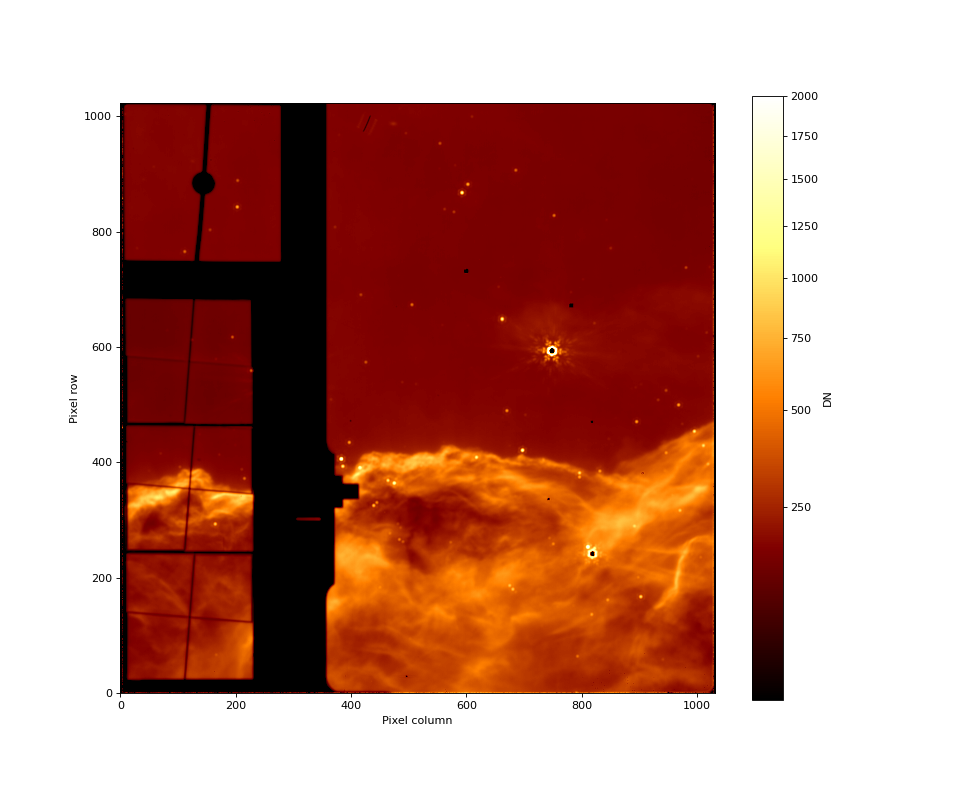

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

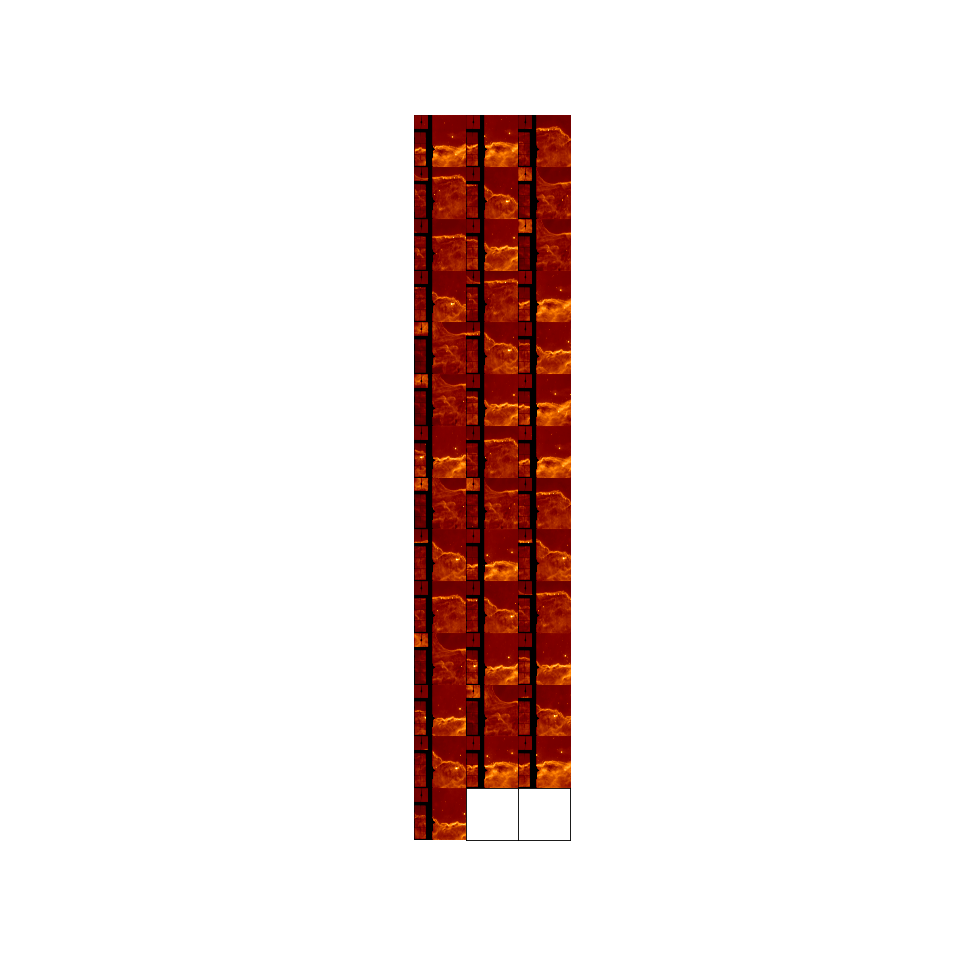

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1280W/stage1/jw02731002001_02105_00006_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002001_02105_00008_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002004_02105_00007_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002004_02105_00003_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002003_02105_00001_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002005_02105_00006_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002004_02105_00005_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002002_02105_00003_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002005_02105_00002_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002003_02105_00006_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002004_02105_00004_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002001_02105_00002_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002005_02105_00004_mirimage_fixed_rate.fits', './F1280W/stage1/jw02731002003_02105_00003_mirimage_fixed_rate.fits', './F1280W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-25 13:35:11,470 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-25 13:35:11,471 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-25 13:35:11,471 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-25 13:35:11,472 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-25 13:35:13,684 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002001_02105_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:35:13,695 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:13,696 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:35:13,696 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:35:13,697 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:35:13,697 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-

2022-07-25 13:35:13,726 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:35:13,726 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:35:13,727 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:35:13,727 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:35:13,727 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:35:13,727 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:13,727 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:35:13,728 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:35:13,728 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:35:

2022-07-25 13:35:13,759 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:35:13,759 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:35:13,759 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:35:13,760 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:35:13,760 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:35:13,760 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:13,761 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:35:13,761 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:35:13,787 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:13,787 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:35:13,788 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:35:13,788 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:35:13,788 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:35:13,788 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:13,788 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:13,789 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002005_02105_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disp

2022-07-25 13:35:13,817 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:13,818 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:35:13,818 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:35:13,819 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0788.fits'.
2022-07-25 13:35:13,820 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:35:13,820 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:35:13,820 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:35:13,820 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-07-25 13:35:13,845 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:13,845 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:13,845 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00003_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:35:13,848 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:13,849 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:35:13,850 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-07-25 13:35:13,877 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0788.fits'.
2022-07-25 13:35:13,878 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:35:13,878 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:35:13,878 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:35:13,879 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:35:13,879 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:35:13,879 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:35:13,879 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:13,879 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:35:13,909 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:13,910 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:35:13,910 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:35:13,910 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:35:13,910 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:35:13,910 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:35:13,911 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:13,912 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 13:35:13,938 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:35:13,938 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:13,938 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:35:13,939 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:35:13,939 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:35:13,939 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:35:13,940 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:13,940 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:13,940 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027310020

2022-07-25 13:35:13,969 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:35:13,969 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:13,970 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:35:13,970 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:35:13,971 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0788.fits'.
2022-07-25 13:35:13,972 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:35:13,972 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-25 13:35:13,999 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:35:13,999 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:13,999 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:14,000 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002003_02105_00004_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:35:14,003 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:14,004 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-25 13:35:14,030 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0788.fits'.
2022-07-25 13:35:14,031 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:35:14,031 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 13:35:14,031 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 13:35:14,032 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 13:35:14,032 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 13:35:14,032 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:35:14,032 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:14,032 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-25 13:35:14,063 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:14,064 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 13:35:14,064 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 13:35:14,064 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 13:35:14,065 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 13:35:14,065 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:35:14,066 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:14,067 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 13:35:14,093 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 13:35:14,093 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 13:35:14,094 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 13:35:14,094 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 13:35:14,094 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 13:35:14,095 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:35:14,095 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:14,095 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:14,095 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027310020

2022-07-25 13:35:14,126 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 13:35:14,127 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:35:14,128 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 13:35:14,128 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 13:35:14,128 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0788.fits'.
2022-07-25 13:35:14,129 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 13:35:14,129 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-25 13:35:14,154 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 13:35:14,154 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 13:35:14,154 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 13:35:14,155 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02731002002_02105_00005_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 13:35:14,158 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 13:35:14,164 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-25 13:35:16,469 - stpipe.Image2Pipeline.photom - INFO -  filter: F1280W
2022-07-25 13:35:16,641 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:35:16,643 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:35:16,643 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:35:16,644 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:35:16,662 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:35:16,895 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:35:16,897 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True,

2022-07-25 13:35:22,548 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-25 13:35:22,572 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:35:22,749 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:35:23,228 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:23,560 - stpip

2022-07-25 13:35:28,778 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:35:29,241 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:29,570 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:35:30,049 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:30,464 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:35:30,934 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:31,271 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:35:31,731 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:32,087 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.168009766 -58.637998413 159.221841873 -58.652175079 159.249315868 -58.623880645 159.195516191 -58.609715455
2022-07-25 1

2022-07-25 13:35:37,554 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:35:37,906 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.160825100 -58.640357954 159.214657913 -58.654537637 159.242139621 -58.626244743 159.188339234 -58.612076538
2022-07-25 13:35:38,451 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02731002004_02105_00003_mirimage_fixed_i2d.fits
2022-07-25 13:35:38,451 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:35:38,452 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02731002004_02105_00003_mirimage_fixed
2022-07-25 13:35:38,453 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002003_02105_00001_mirimage_fixed
2022-07-25 13:35:38,453 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02731002003_02105_00001_mirimage_fixed_rate.fits ...
2022-07-25 13:35:38,762 - stpip

2022-07-25 13:35:44,172 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002005_02105_00006_mirimage_fixed
2022-07-25 13:35:44,172 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02731002005_02105_00006_mirimage_fixed_rate.fits ...
2022-07-25 13:35:44,493 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:35:44,495 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:35:50,436 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:35:50,516 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.167259671 -58.643670838 159.220997795 -58.657697154 159.248109956 -58.629628626 159.194566778 -58.615331905
2022-07-25 13:35:50,517 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.167259671 -58.643670838 159.220997795 -58.657697154 159.248109956 -58.629628626 159.194566778 -58.615331905
2022-07-25 13:35:50,517 - stpip

2022-07-25 13:35:56,276 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.191751254 -58.609312173 159.245446134 -58.623328521 159.272512470 -58.595254977 159.219012140 -58.580968172
2022-07-25 13:35:56,277 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:35:56,345 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:35:56,622 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:35:56,623 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:36:02,489 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:36:02,489 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:36:02,490 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:36:02,495 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:36:02,618 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:36:02,886 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:36:02,887 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:36:08,697 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:36:08,698 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:36:08,721 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:36:08,721 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:36:08,800 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:36:08

2022-07-25 13:36:14,577 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:36:14,658 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:36:14,659 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:36:14,659 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:36:14,659 - stpipe.Image2Pipeline.photom - INFO -  filter: F1280W
2022-07-25 13:36:14,701 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:36:14,703 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:36:14,704 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:36:14,704 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:36:14,720 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:36:14,994 - stpipe.Im

2022-07-25 13:36:20,593 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:36:20,593 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:36:20,610 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:36:20,877 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:36:20,879 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:36:26,721 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:36:26,864 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:36:27,317 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:36:27,651 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:36:28,114 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:36:28,452 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:36:28,931 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:36:29,419 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:36:29,878 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:36:30,230 - stpipe.Image2Pipeline.resample 

2022-07-25 13:36:35,384 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:36:35,856 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:36:36,211 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.176173738 -58.624812792 159.229988516 -58.638986379 159.257446184 -58.610690378 159.203663818 -58.596528259
2022-07-25 13:36:36,762 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02731002003_02105_00003_mirimage_fixed_i2d.fits
2022-07-25 13:36:36,762 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:36:36,763 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02731002003_02105_00003_mirimage_fixed
2022-07-25 13:36:36,764 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002002_02105_00004_mirimage_fixed
2022-07-25 13:36:36,764 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/

2022-07-25 13:36:42,685 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002005_02105_00003_mirimage_fixed
2022-07-25 13:36:42,685 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02731002005_02105_00003_mirimage_fixed_rate.fits ...
2022-07-25 13:36:43,006 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:36:43,008 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:36:49,008 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:36:49,097 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.194062239 -58.609875048 159.247758872 -58.623890474 159.274823863 -58.595816464 159.221321769 -58.581530579
2022-07-25 13:36:49,098 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.194062239 -58.609875048 159.247758872 -58.623890474 159.274823863 -58.595816464 159.221321769 -58.581530579
2022-07-25 13:36:49,098 - stpip

2022-07-25 13:36:54,894 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.214240791 -58.591399475 159.267917290 -58.605406332 159.294951498 -58.577328010 159.241469274 -58.563050655
2022-07-25 13:36:54,894 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:36:54,961 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:36:55,238 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:36:55,239 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:37:01,192 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:37:01,192 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:37:01,193 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:37:01,198 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:37:01,318 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:37:01,601 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:37:01,602 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:37:07,408 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-25 13:37:07,409 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:37:07,432 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:37:07,432 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:37:07,511 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:37:07

2022-07-25 13:37:13,252 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:37:13,331 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:37:13,331 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:37:13,331 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:37:13,331 - stpipe.Image2Pipeline.photom - INFO -  filter: F1280W
2022-07-25 13:37:13,372 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:37:13,374 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:37:13,374 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:37:13,375 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:37:13,391 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:37:13,671 - stpipe.Im

2022-07-25 13:37:19,217 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:37:19,217 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:37:19,233 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:37:19,525 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002005_02105_00008_mirimage_fixed_rate.fits>,).
2022-07-25 13:37:19,526 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:37:25,423 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:37:25,565 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:37:26,032 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:37:26,362 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:37:26,829 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:37:27,174 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:37:27,639 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:37:27,972 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:37:28,434 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:37:28,784 - stpipe.Image2Pipeline.resample 

2022-07-25 13:37:33,935 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:37:34,396 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:37:34,756 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.169374950 -58.639168392 159.223209294 -58.653344613 159.250683345 -58.625049952 159.196881435 -58.610885207
2022-07-25 13:37:35,478 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02731002004_02105_00006_mirimage_fixed_i2d.fits
2022-07-25 13:37:35,479 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:37:35,479 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02731002004_02105_00006_mirimage_fixed
2022-07-25 13:37:35,480 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002003_02105_00008_mirimage_fixed
2022-07-25 13:37:35,481 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/

2022-07-25 13:37:41,686 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002001_02105_00005_mirimage_fixed
2022-07-25 13:37:41,686 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02731002001_02105_00005_mirimage_fixed_rate.fits ...
2022-07-25 13:37:42,030 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:37:42,031 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:37:48,187 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:37:48,269 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.176200276 -58.626471197 159.229915362 -58.640493956 159.257007334 -58.612423639 159.203487020 -58.598130454
2022-07-25 13:37:48,270 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.176200276 -58.626471197 159.229915362 -58.640493956 159.257007334 -58.612423639 159.203487020 -58.598130454
2022-07-25 13:37:48,270 - stpip

2022-07-25 13:37:54,393 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.168417377 -58.641014619 159.222151994 -58.655040332 159.249260931 -58.626971501 159.195721233 -58.612675379
2022-07-25 13:37:54,393 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:37:54,460 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:37:54,770 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00001_mirimage_fixed_rate.fits>,).
2022-07-25 13:37:54,771 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:38:00,769 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:00,769 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:00,770 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:00,775 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:00,893 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:38:01,193 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:38:01,195 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:38:07,066 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002004_02105_00008_mirimage_fixed_rate.fits>,).
2022-07-25 13:38:07,068 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:38:07,090 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:38:07,090 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:38:07,170 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:38:07

2022-07-25 13:38:12,993 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:38:13,073 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:38:13,073 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 13:38:13,073 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 13:38:13,074 - stpipe.Image2Pipeline.photom - INFO -  filter: F1280W
2022-07-25 13:38:13,115 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 13:38:13,116 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 13:38:13,117 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:38:13,117 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:38:13,134 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:38:13,437 - stpipe.Im

2022-07-25 13:38:19,043 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 13:38:19,043 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.427399
2022-07-25 13:38:19,060 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 13:38:19,365 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00006_mirimage_fixed_rate.fits>,).
2022-07-25 13:38:19,366 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 13:38:25,328 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:38:25,466 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 13:38:25,926 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:38:26,260 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 13:38:26,727 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:38:27,063 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:38:27,529 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:38:27,864 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:38:28,324 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:38:28,676 - stpipe.Image2Pipeline.resample 

2022-07-25 13:38:33,770 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 13:38:34,232 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 13:38:34,583 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  159.198847723 -58.609872092 159.252648579 -58.624036317 159.280076371 -58.595735545 159.226307922 -58.581582776
2022-07-25 13:38:35,126 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02731002002_02105_00001_mirimage_fixed_i2d.fits
2022-07-25 13:38:35,126 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 13:38:35,127 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02731002002_02105_00001_mirimage_fixed
2022-07-25 13:38:35,128 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002005_02105_00005_mirimage_fixed
2022-07-25 13:38:35,128 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/

2022-07-25 13:38:41,069 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02731002003_02105_00007_mirimage_fixed
2022-07-25 13:38:41,070 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02731002003_02105_00007_mirimage_fixed_rate.fits ...
2022-07-25 13:38:41,427 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02731002003_02105_00007_mirimage_fixed_rate.fits>,).
2022-07-25 13:38:41,429 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 13:38:47,478 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 13:38:47,559 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  159.180948342 -58.625565174 159.234663972 -58.639585921 159.261751361 -58.611514589 159.208230465 -58.597223409
2022-07-25 13:38:47,560 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.180948342 -58.625565174 159.234663972 -58.639585921 159.261751361 -58.611514589 159.208230465 -58.597223409
2022-07-25 13:38:47,560 - stpip

2022-07-25 13:38:53,530 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  159.206851164 -58.595371989 159.260530883 -58.609381841 159.287573930 -58.581305027 159.234088561 -58.567024688
2022-07-25 13:38:53,530 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 13:38:53,599 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 13:38:53,916 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00004_mirimage_fixed_rate.fits>,).
2022-07-25 13:38:53,917 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_fl

2022-07-25 13:38:59,977 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:59,978 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:59,978 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:38:59,984 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 13:39:00,102 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 13:39:00,416 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002001_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-25 13:39:00,417 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 13:39:06,297 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02731002002_02105_00005_mirimage_fixed_rate.fits>,).
2022-07-25 13:39:06,298 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 13:39:06,322 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 13:39:06,322 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 13:39:06,400 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 13:39:06

2022-07-25 13:39:11,975 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002001_02105_00008_mirimage_fixed_cal.fits
2022-07-25 13:39:12,546 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002004_02105_00007_mirimage_fixed_cal.fits
2022-07-25 13:39:13,112 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002004_02105_00003_mirimage_fixed_cal.fits
2022-07-25 13:39:13,679 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002003_02105_00001_mirimage_fixed_cal.fits
2022-07-25 13:39:14,264 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002005_02105_00006_mirimage_fixed_cal.fits
2022-07-25 13:39:14,825 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002004_02105_00005_mirimage_fixed_cal.fits
2022-07-25 13:39:15,403 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02731002002_02105_00003_mirimage_fixed_cal.fits
2022-07-25 13:39:15,982 - stpipe.I

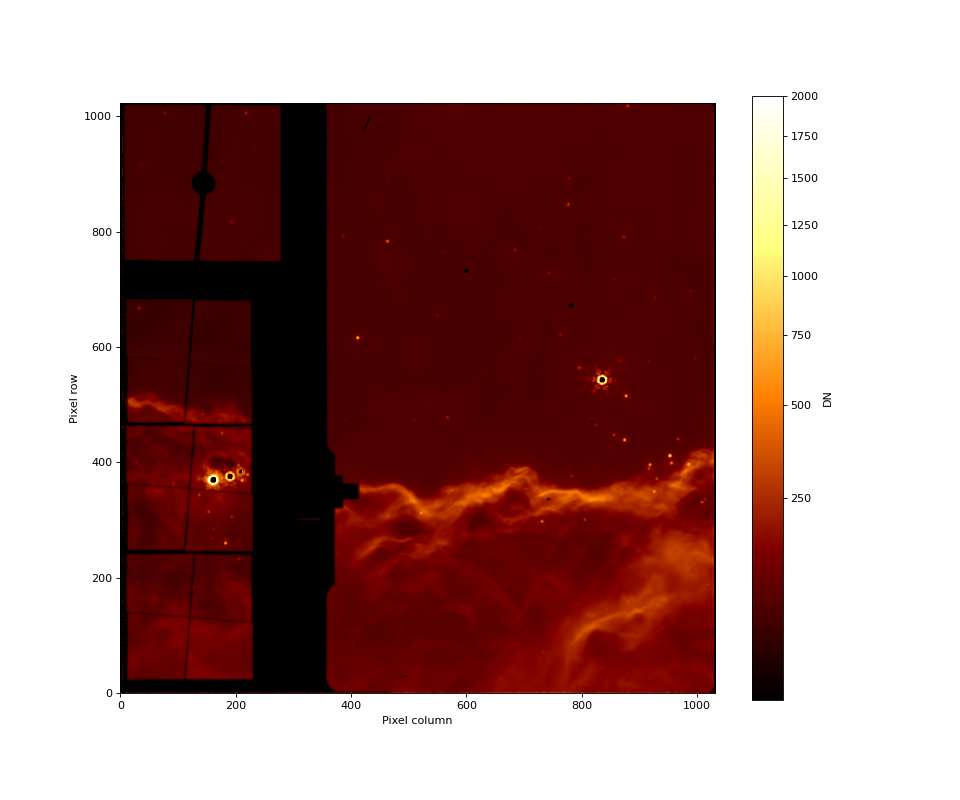

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

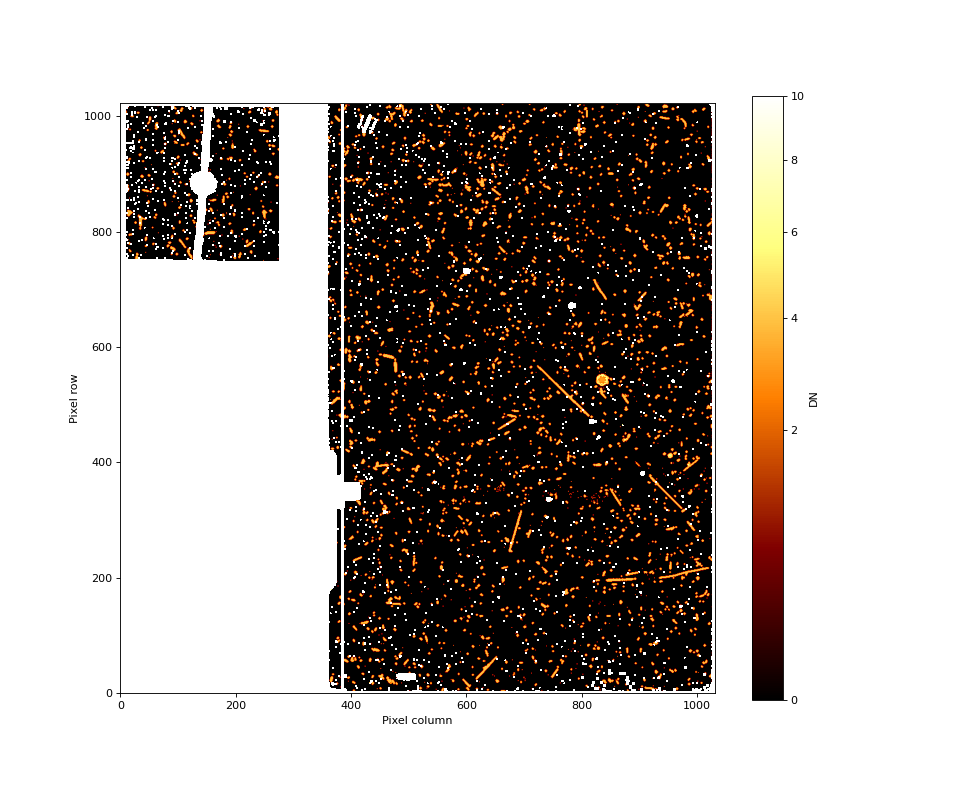

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

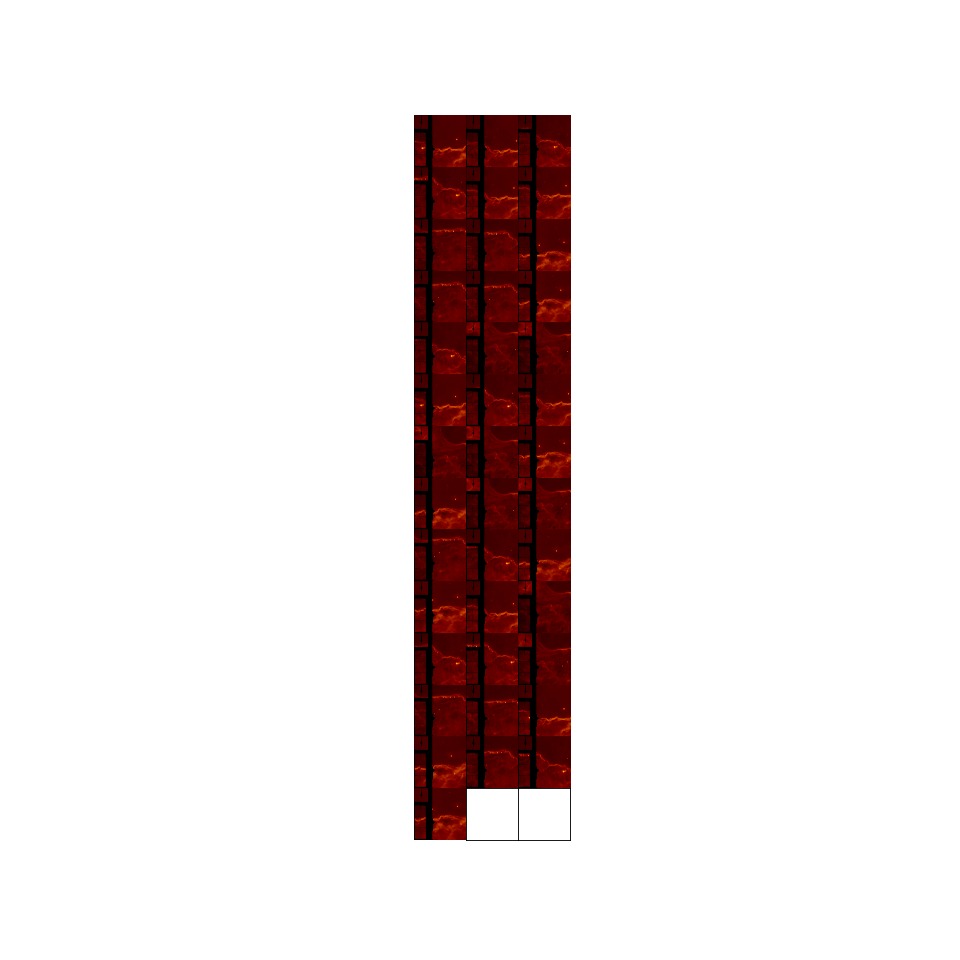

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}3*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}4*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)
    
# update the WCS for mosaic tile 5
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}5*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile5_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1280W/stage2/jw02731002005_02105_00005_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002003_02105_00006_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002002_02105_00003_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002002_02105_00007_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002002_02105_00005_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002004_02105_00007_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002003_02105_00001_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002005_02105_00004_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002003_02105_00004_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002005_02105_00003_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002005_02105_00006_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002002_02105_00001_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002001_02105_00002_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02731002002_02105_00006_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-25 13:40:35,404 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-25 13:40:35,405 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 13:40:35,406 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-25 13:40:35,407 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-25 13:40:36,024 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 13:40:36,025 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-25 13:40:43,841 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-25 13:40:43,843 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 3.7, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-25 13:41:40,968 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:41,740 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:42,512 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:43,272 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:44,027 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:44,788 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:45,563 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:46,352 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1187, 3470)
2022-07-25 13:41:47,124 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (102

2022-07-25 13:42:14,613 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 40845 (3.87%)
2022-07-25 13:42:14,689 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 106116 (10.04%)
2022-07-25 13:42:14,766 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 57771 (5.47%)
2022-07-25 13:42:14,846 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 67731 (6.41%)
2022-07-25 13:42:14,962 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 70892 (6.71%)
2022-07-25 13:42:15,040 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 59269 (5.61%)
2022-07-25 13:42:15,126 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 56801 (5.37%)
2022-07-25 13:42:16,214 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F1280W/stage3/jw02731002005_02105_00005_mirimage_fixed_wcs_

2022-07-25 13:42:54,876 - stpipe.Image3Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 13:42:55,411 - stpipe.Image3Pipeline.resample - INFO - Blending metadata for miri_F1280W_stage3_asn
2022-07-25 13:42:56,318 - stpipe.Image3Pipeline.resample - INFO - Resampling science data
2022-07-25 13:42:56,936 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:42:57,870 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:42:58,805 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:42:59,732 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:43:00,659 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:43:01,597 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 349

2022-07-25 13:44:06,082 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:07,028 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:07,973 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:08,929 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:09,879 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:10,829 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:11,776 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:12,129 - stpipe.Image3Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 13:44:12,750 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:44:13,699 - stpipe.Image3Pipeline.resample - INFO

2022-07-25 13:45:18,991 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:19,952 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:20,917 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:21,885 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:22,833 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:23,785 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:24,735 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:25,700 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:26,690 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1196, 3499)
2022-07-25 13:45:27,643 - stpipe.Image3Pipelin

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

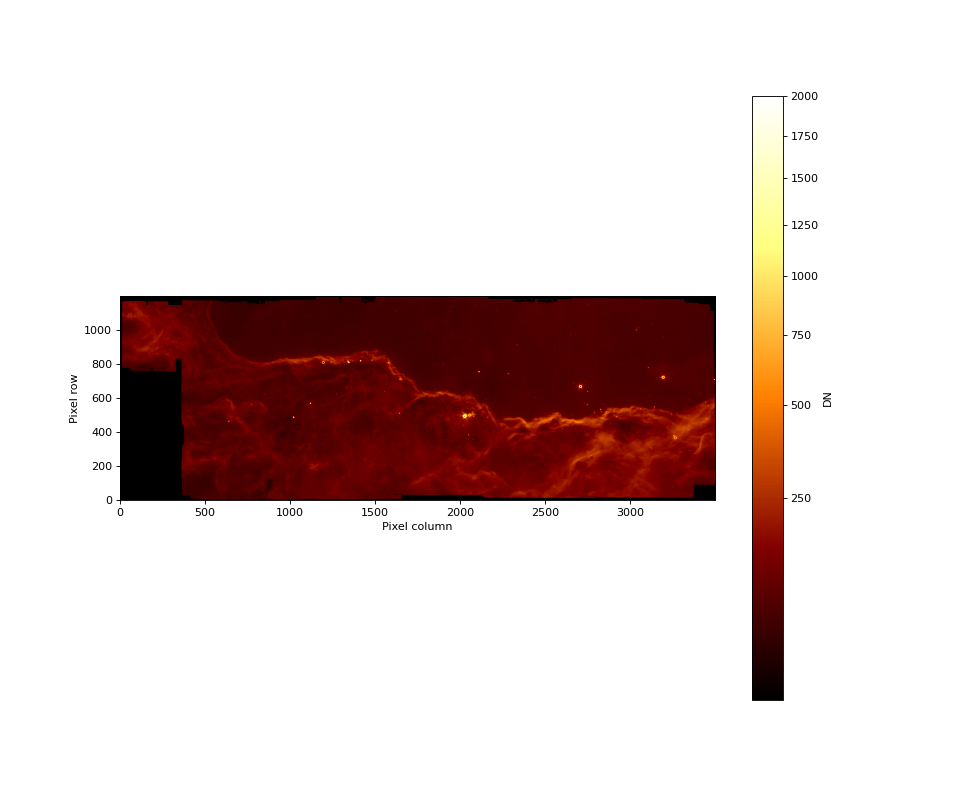

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

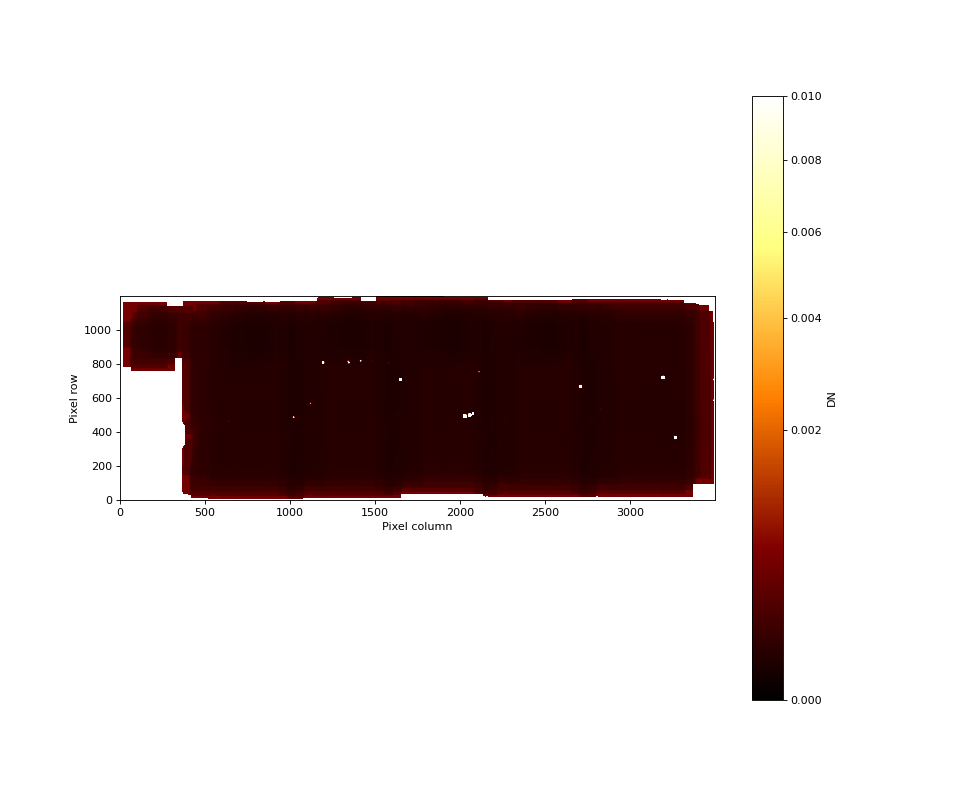

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

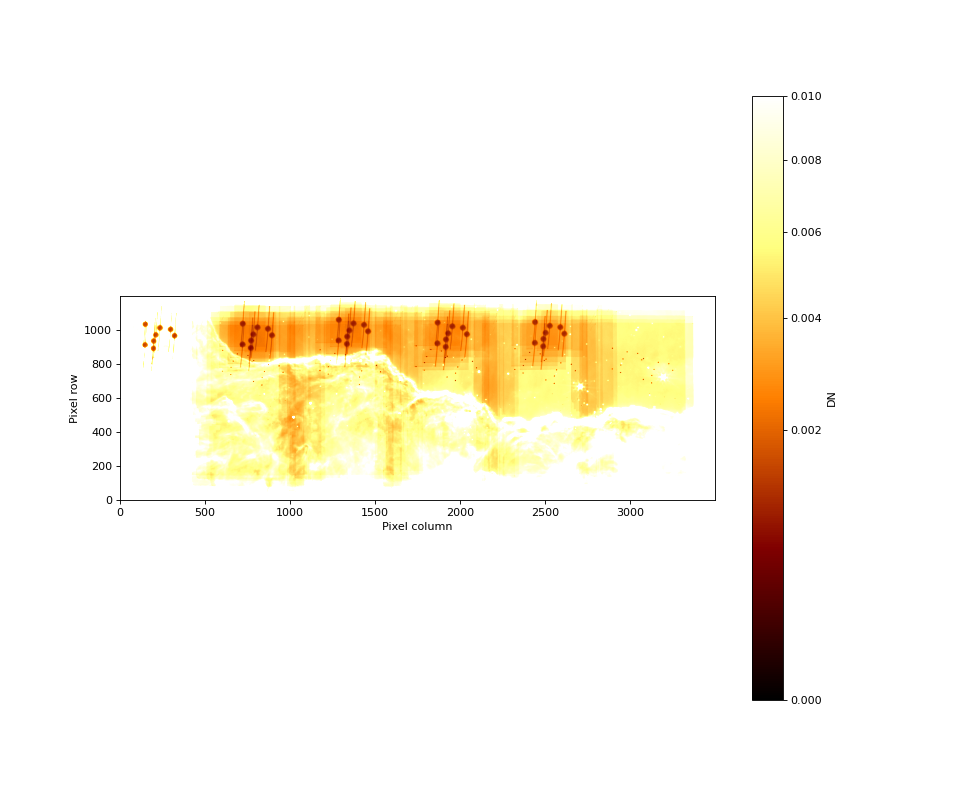

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

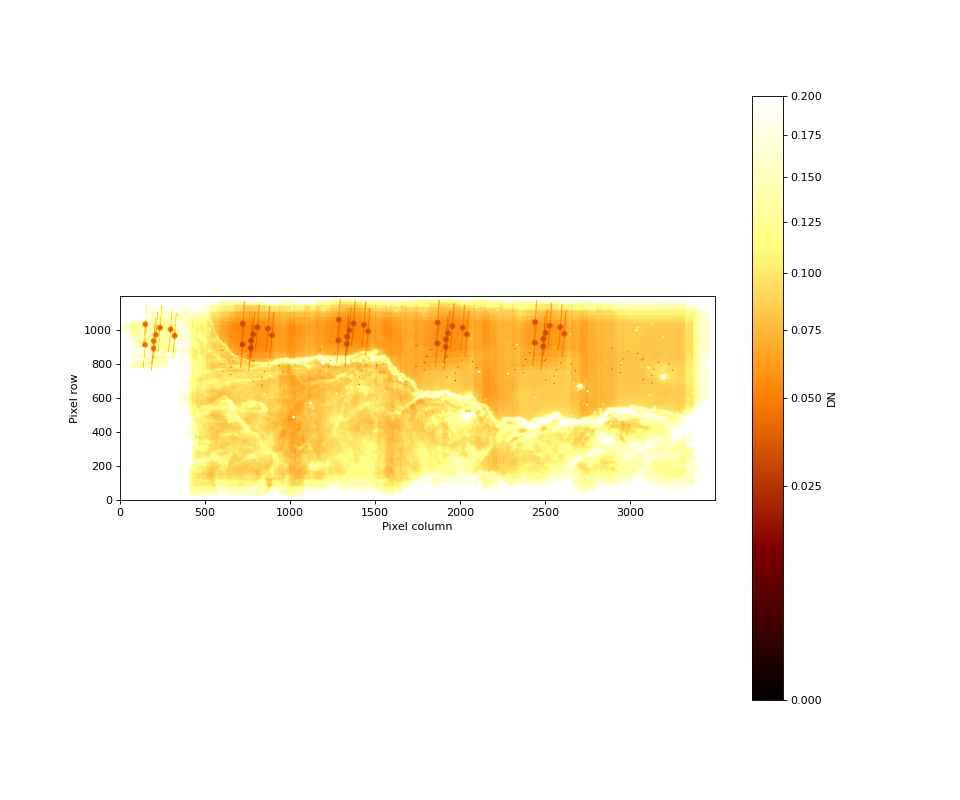

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

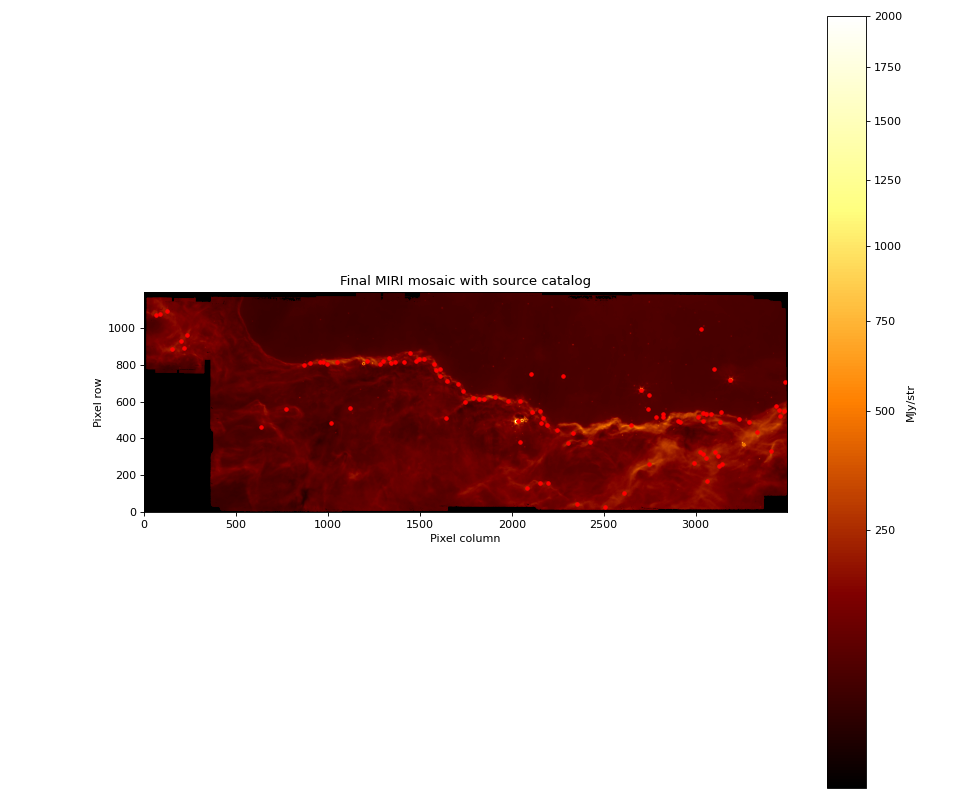

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)